In [1]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
db = pd.read_json("dim_customer.json",orient="records")

Easy

1. How many unique customers are in the dataset?

In [3]:
db["id"].nunique()

5191

2. What are the different categories of products available? How many unique categories are there?

In [4]:
list(df["category"].unique())

['Clothing',
 'Shoes',
 'Books',
 'Cosmetics',
 'Food & Beverage',
 'Toys',
 'Technology',
 'Souvenir']

In [5]:
df["category"].nunique()

8

3. Which payment method is the most popular? How many times was it used?

In [6]:
df["payment_method"].value_counts().nlargest(1)

payment_method
Cash    44447
Name: count, dtype: int64

Medium

1. What are the three most popular categories, by total sales?

In [7]:
df.groupby("category").sum()["quantity"].nlargest(3)

category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64

2. What are the total sales attributed to customers over the age of 45?

In [8]:
df[df["customer_id"].isin(db[db["age"] > 45]["id"])].sum()["quantity"]

97629

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

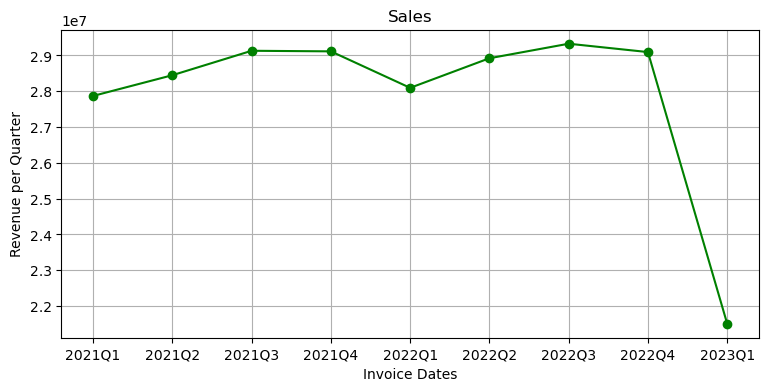

In [9]:
import datetime
import matplotlib.pyplot as plt

df["invoice_date"] = pd.to_datetime(df["invoice_date"], format="%d/%m/%Y")
df["revenue"] = df["quantity"] * df["price"]

df = df.groupby(df["invoice_date"].dt.to_period("Q")).agg({"revenue": "sum"}).reset_index()
df["invoice_date"] = df["invoice_date"].astype(str)

plt.figure(figsize=(9, 4))
plt.plot(df["invoice_date"], df["revenue"], color="green", marker="o")
plt.xlabel("Invoice Dates")
plt.ylabel("Revenue per Quarter")
plt.title("Sales")
plt.grid(True)
plt.show()

Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [10]:
df = pd.read_csv("fct_invoice.csv")

df = pd.merge(df, db[["id", "age"]], left_on="customer_id", right_on="id", how="left")

df = df[df["age"].notnull()]

df["decade_age_range"] = pd.cut(df["age"], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], labels=["10 to 19", "20 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", "70 to 79", "80 to 89"])

df["revenue"] = df["quantity"] * df["price"]

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.pivot_table(df, values="revenue", index=["category", "decade_age_range"], aggfunc="sum", margins=True, margins_name="Total", observed=False).style.format("{:.2f}")